**Importing necessary libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Preprocessing**

In [ ]:
df=pd.read_csv("train.csv")
df.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.shape

(891, 12)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.columns
# renaming can be done as well
# df.rename(columns-{'PassengerId' : 'PId'}, inplace-True)
# df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.drop(columns=['PassengerId','Cabin','Ticket'], inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
S=df['Embarked'].mode()
S

0    S
dtype: object

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(S[0], inplace=True)
df.isnll().sum()

AttributeError: ignored

**Data Visualization**

0    549
1    342
Name: Survived, dtype: int64


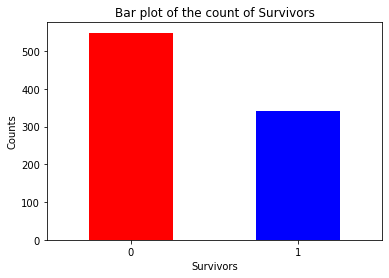

In [ ]:
colors=['red','blue']
x = df['Survived'].value_counts()
print(x)
x.plot(kind='bar', rot=0, color=colors)
plt.xlabel("Survivors")
plt.ylabel("Counts")
plt.title("Bar plot of the count of Survivors")
plt.show()

0    549
1    342
Name: Survived, dtype: int64


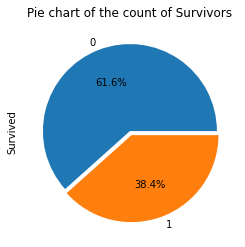

In [ ]:
x = df['Survived'].value_counts()
print(x)
x.plot(kind='pie', explode=[0,0.05], autopct='%1.1f%%')
plt.title("Pie chart of the count of Survivors")
plt.show()

male      577
female    314
Name: Sex, dtype: int64


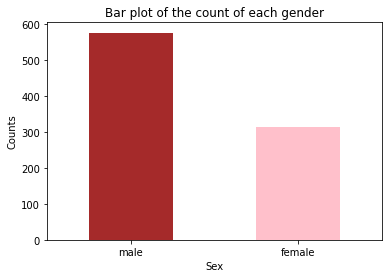

In [ ]:
colors=['brown','pink']
x = df['Sex'].value_counts()
print(x)
x.plot(kind='bar', rot=0, color=colors)
plt.xlabel("Sex")
plt.ylabel("Counts")
plt.title("Bar plot of the count of each gender")
plt.show()

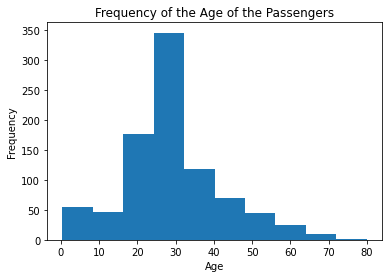

In [ ]:
plt.hist(df['Age'])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Frequency of the Age of the Passengers")
plt.show()

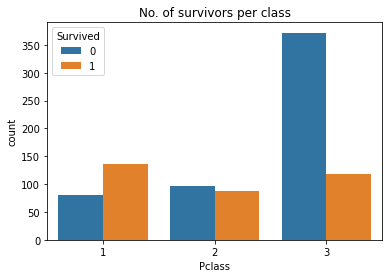

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("No. of survivors per class")
plt.show()

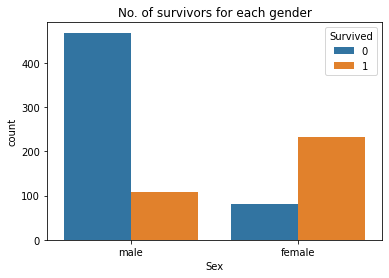

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("No. of survivors for each gender")
plt.show()

**Outlier Detection**

Outliers are extreme values, that completely deviate from he other observations on the data. They could result in incorrect analysis.

**Example:**

Data Observations - [4,2,3,1,60]


Average without 60 = 2.5

Average with 60 = 14

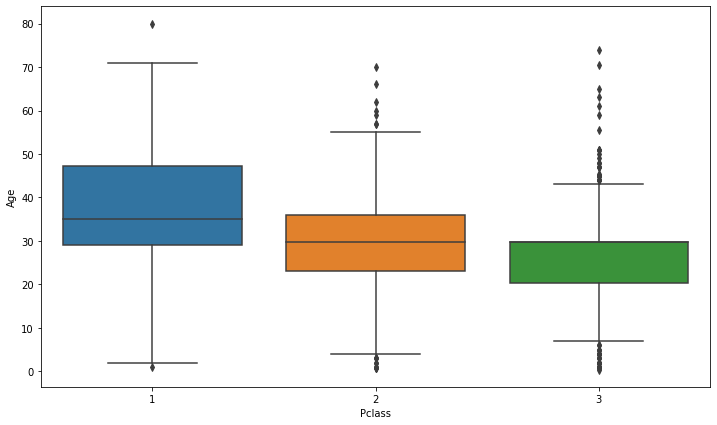

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass", y="Age", data=df)